In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

# Dataset Loading

In [3]:
train_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [4]:
train_df.shape, test_df.shape

((20000, 22), (5000, 21))

# EDA

## Dataset Information

In [5]:
print("Number of rows in the training data: ", train_df.shape[0])
print("Number of columns in the training data: ", train_df.shape[1])

print("Number of rows in the testing data: ", test_df.shape[0])
print("Number of columns in the testing data: ", test_df.shape[1])

Number of rows in the training data:  20000
Number of columns in the training data:  22
Number of rows in the testing data:  5000
Number of columns in the testing data:  21


In [6]:
# Head of the training data
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


#### We can observe that 'Latitude' and 'Longitude' represent the same thing as 'Location'.
#### 'Area_ID', 'Premise_Code', 'Weapon_Used_Code', 'Status' also represent the same thing as 'Area_Name', 'Premise_Description', 'Weapon_Description', 'Status_Description'

In [7]:
# All columns in the training dataset
train_df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [8]:
# Data Types of each column in the training dataset:

train_df.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [9]:
# Total number of null values present in each feature

train_df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [10]:
# Visualising key statistics:

train_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


## Correlation-Heatmap

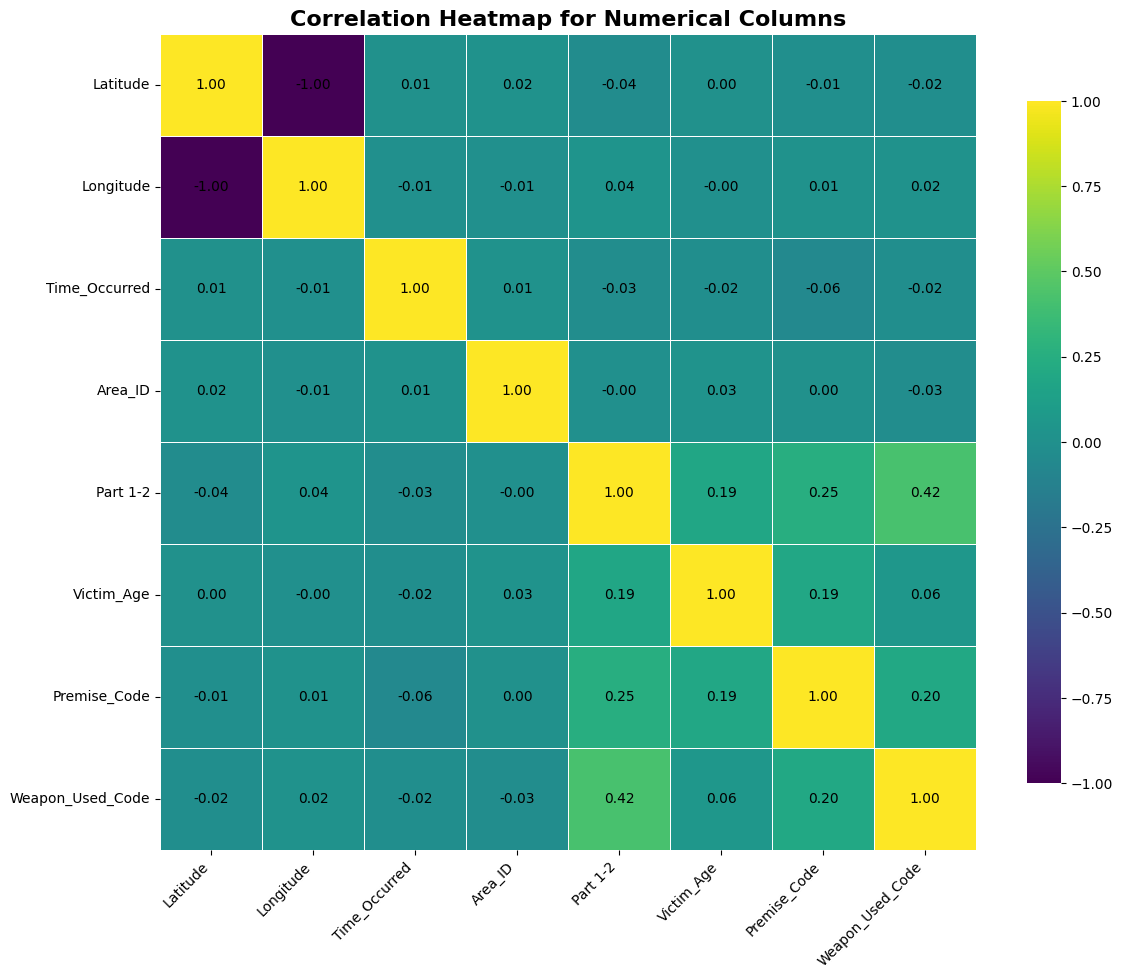

In [11]:
# List of numerical columns
numerical_cols = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']

# Select only numerical columns from the DataFrame
numerical_df = train_df[numerical_cols]

# Calculate the correlation matrix for numerical columns
corr = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    cbar_kws={'shrink': .8},
    square=True,
    annot_kws={"size": 10, "color": 'black'}
)

# Set the title fontsize and fontweight
plt.title('Correlation Heatmap for Numerical Columns', fontsize=16, fontweight='bold')

# Remove axes labels and ticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# plot the graph
plt.tight_layout()
plt.show()

#### As we can observe here there isn't much correlation between features here.

## Distribution of 'Crime_Category'

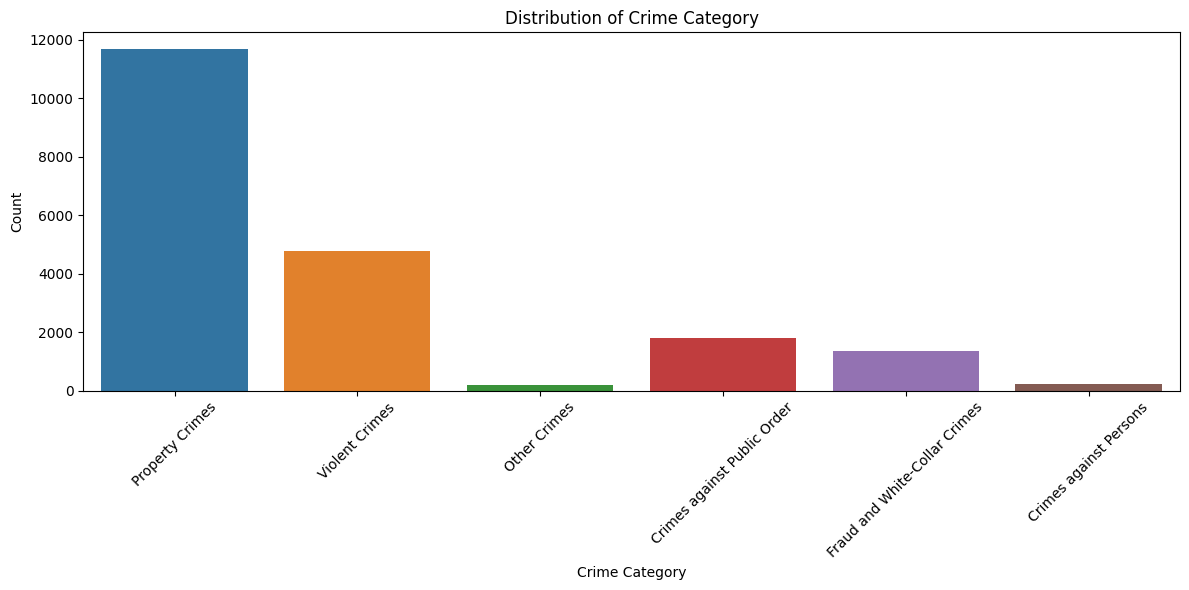

In [12]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train_df, x='Crime_Category')
plt.title('Distribution of Crime Category')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel('Crime Category')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

#### The target vector 'Crime_Category' has lot of Property Crimes followed by Violent crimes majorly compared to the other crimes.

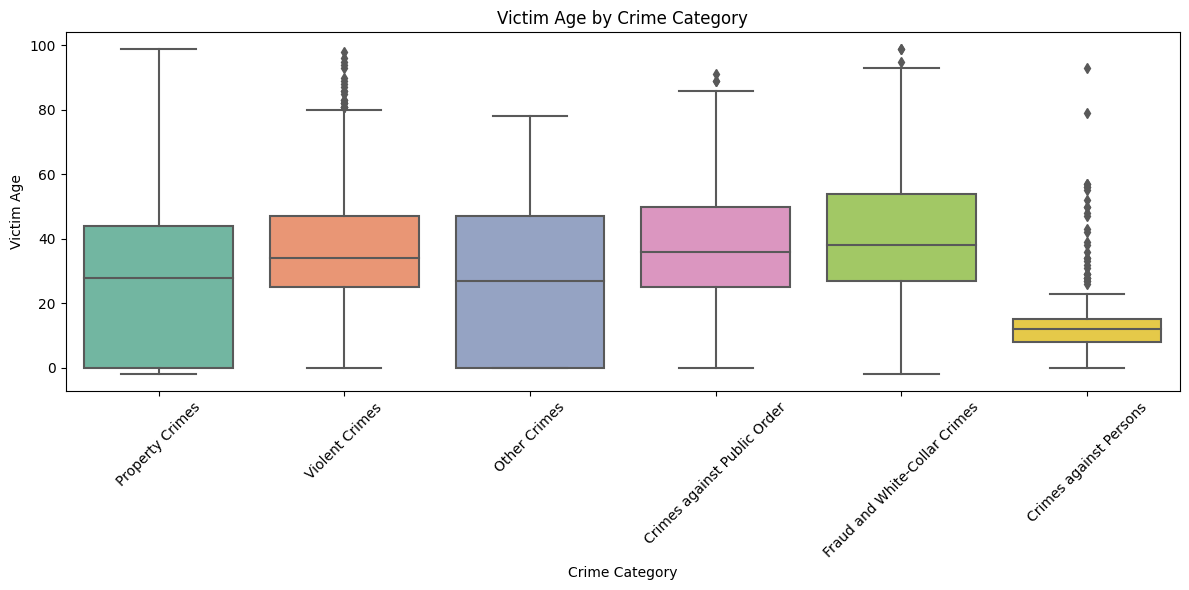

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Crime_Category', y='Victim_Age', palette='Set2')
plt.title('Victim Age by Crime Category')
plt.xticks(rotation=45)
plt.xlabel('Crime Category')
plt.ylabel('Victim Age')
plt.tight_layout()
plt.show()

#### We can observe key statistics like median, range, etc.. of each 'Crime_Category' from the above box plots.

## Visualising Missing Values

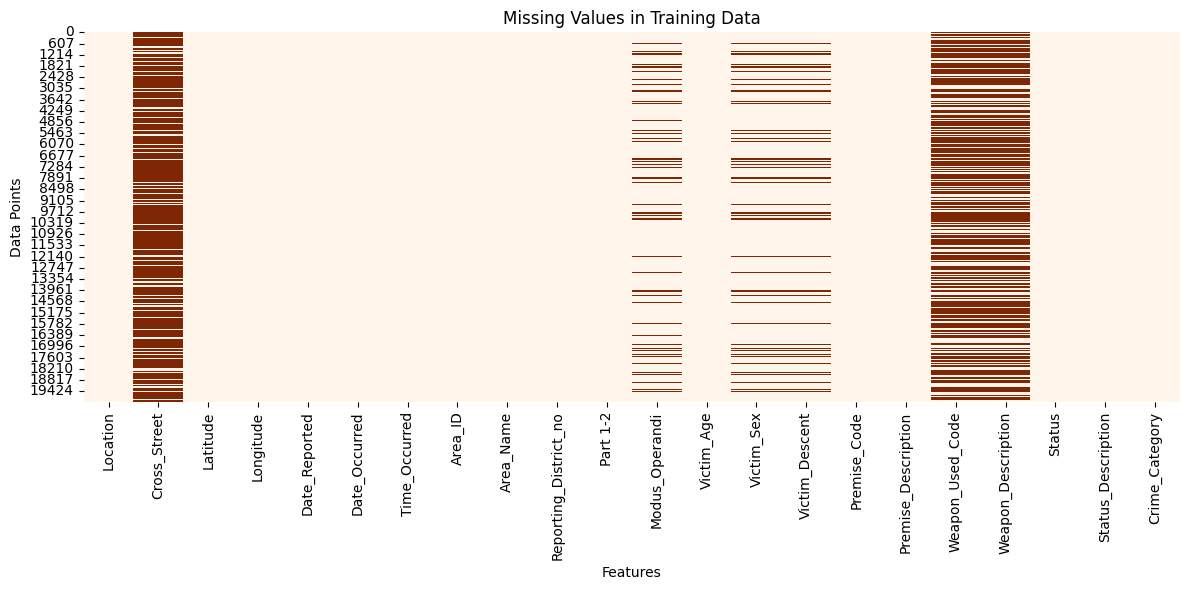

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='Oranges', vmin=0, vmax=1)
plt.title('Missing Values in Training Data')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.tight_layout()
plt.show()

#### We can observe from missing values graphical representation that a lot of Cross_Street values are missing.
#### We can also observe from a quick glance that wherever Modus_Operandi is missing, Victim_Sex and Victim_Descent are also misisng.

#### Lot of 'Weapon_Used_Code' values are also missing. It might indicate crimes in which no weapon is involved or the weapon involved is not recorded.

## Distribution of 'Victim_Age'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


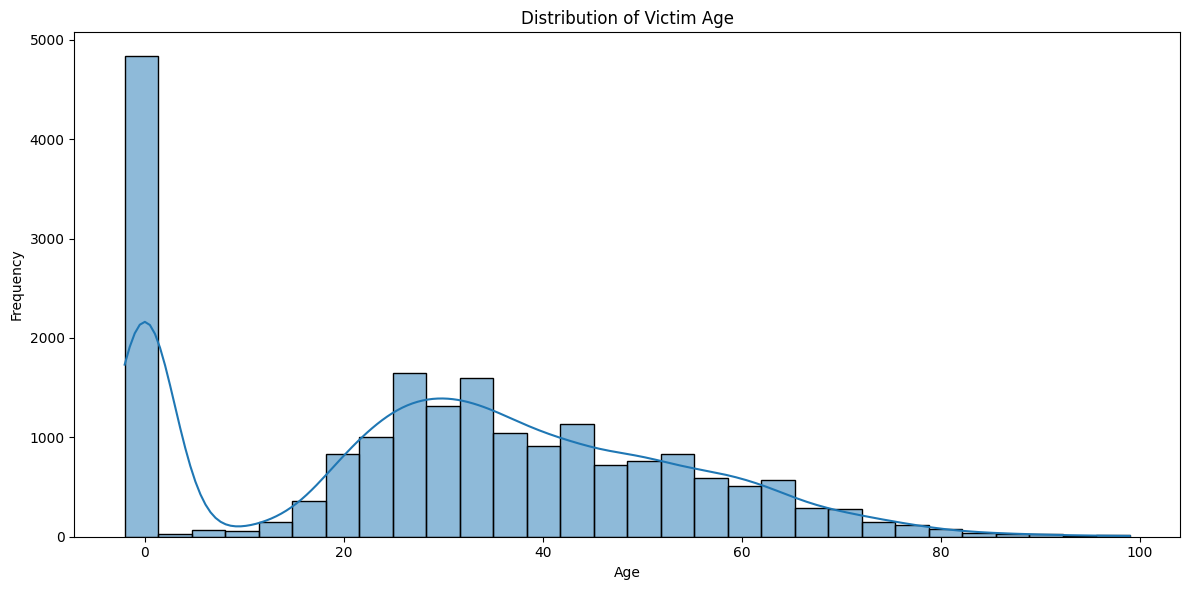

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Victim_Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### A lot of crimes tend to have 0 Age. So, either the crimes happen to infants or the Age is missing. As the proportion is lot higher we can assume the Age is missing for these rows.
#### Right Skewed graph.

## Visualising crimes by hour of the day

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


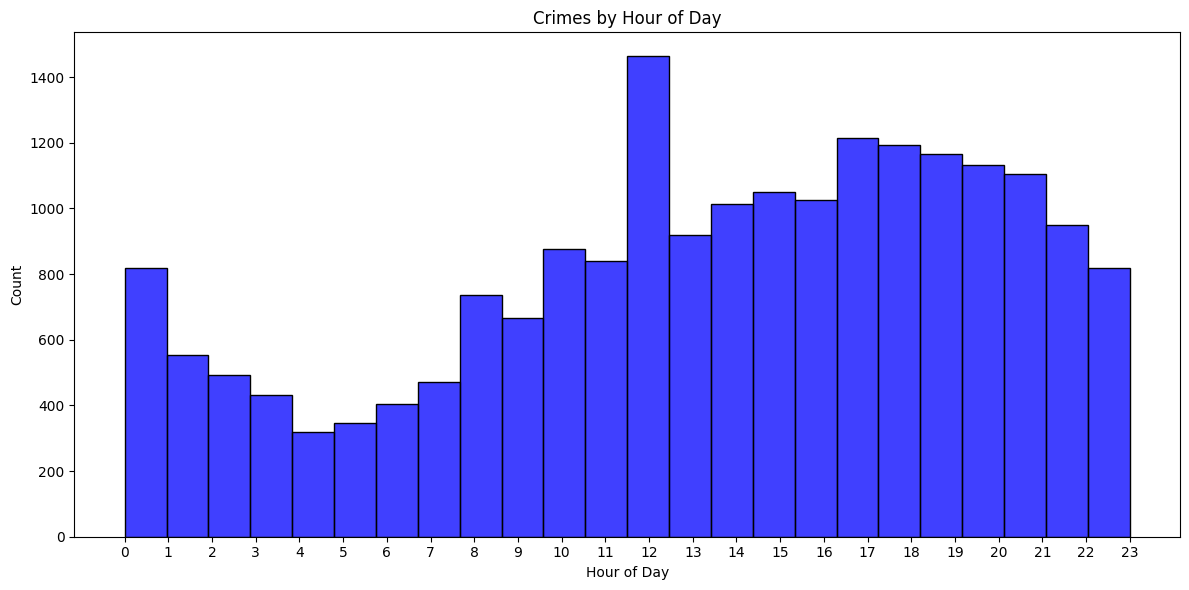

In [16]:
# Create a function to extract hours from the time format
def extract_hour(time):
    if pd.notna(time):
        time_str = str(int(time)).zfill(4)  # Ensure 4-digit string format
        return int(time_str[:2])  # Extract hour
    return None

# Use a temporary Series to avoid modifying the DataFrame
hours = train_df['Time_Occurred'].apply(extract_hour)

# Plot the histogram of hours
plt.figure(figsize=(12, 6))
sns.histplot(hours.dropna(), bins=24, kde=False, color='blue')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Ensure all hours are shown on x-axis
plt.tight_layout()
plt.show()


#### We can observe that most of the crimes happen in the middle of the day.
#### The graph is somewhat Left Skewed with most of the crimes happeing in the second half of the day.

# Preprocessing

In [17]:
# Seperate the target vector from train_df for ease of preprocessing
y = train_df['Crime_Category']
train_df.drop('Crime_Category', axis=1, inplace=True)

In [18]:
train_df.shape, test_df.shape

((20000, 21), (5000, 21))

In [19]:
# Null values of each feature to preprocess them
train_df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
dtype: int64

In [20]:
# Columns of Train and Test Data:

print("Columns of Train Data: ", list(train_df.columns) )
print("Columns of Test Data: ", list(test_df.columns))

Columns of Train Data:  ['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description']
Columns of Test Data:  ['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description']


## Impute values

In [21]:
# Function definitions for imputing each column:

def transform_cross_street(df):
    df['Cross_Street'] = df['Cross_Street'].fillna(0).astype(bool)
    return df

def transform_victim_sex(df):
    df['Victim_Sex'] = df['Victim_Sex'].fillna(0)
    return df

def transform_victim_descent(df):
    df['Victim_Descent'] = df['Victim_Descent'].fillna(0)
    return df
  
def transform_weapon_used_code(df):
    df['Weapon_Used_Code'] = df['Weapon_Used_Code'].fillna(0)
    return df
    
# Pipeline for imputing desired columns:

imputer_pipeline = Pipeline(steps=[
    ('cross_street_imputer', FunctionTransformer(transform_cross_street)),
    ('victim_sex_imputer', FunctionTransformer(transform_victim_sex)),
    ('victim_descent_imputer', FunctionTransformer(transform_victim_descent)),
    ('weapon_used_code_imputer', FunctionTransformer(transform_weapon_used_code))
])

# Fit the datasets on the pipeline and transform them:

imputer_pipeline.fit_transform(train_df)
imputer_pipeline.transform(test_df)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,False,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,False,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,NaN,IC,Invest Cont
2,300 E 111TH ST,False,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,0.0,NaN,IC,Invest Cont
3,1300 S LA BREA AV,False,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,0,0,108.0,PARKING LOT,0.0,NaN,IC,Invest Cont
4,11000 MORRISON ST,False,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,0.0,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,False,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,0,0,101.0,STREET,0.0,NaN,IC,Invest Cont
4996,2200 E 7TH ST,False,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,0.0,NaN,IC,Invest Cont
4997,LANGDON AV,True,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,False,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [22]:
train_df.shape, test_df.shape

((20000, 21), (5000, 21))

In [23]:
# Check the null values again:
train_df.isna().sum()

Location                     0
Cross_Street                 0
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                   0
Victim_Descent               0
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code             0
Weapon_Description       12665
Status                       0
Status_Description           0
dtype: int64

## Feature Extraction

In [24]:
# Function to extract Day, Month and Year from 'Date_Reported' & 'Date_Occurred' columns: 

def date_transformer(df):
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
  df['Day_Reported'] = df['Date_Reported'].dt.day
  df['Month_Reported'] = df['Date_Reported'].dt.month
  df['Year_Reported'] = df['Date_Reported'].dt.year
  df['Day_Occurred'] = df['Date_Occurred'].dt.day
  df['Month_Occurred'] = df['Date_Occurred'].dt.month
  df['Year_Occurred'] = df['Date_Occurred'].dt.year
  df = df.drop(['Date_Reported', 'Date_Occurred'], axis=1)
  return df

# Pipeline for extracting desired features:

date_transformer_pipeline = Pipeline(steps=[
    ('transform_date', FunctionTransformer(date_transformer))
])

# Fit and Transform the datasets on the pipeline:

transformed_train_df = date_transformer_pipeline.fit_transform(train_df)
transformed_test_df = date_transformer_pipeline.transform(test_df)

In [25]:
train_df.shape, test_df.shape

((20000, 27), (5000, 27))

In [26]:
# Drop all the redundant columns

columns_to_drop = ['Date_Reported', 'Date_Occurred', 'Location','Weapon_Description', 'Status_Description', 'Premise_Description', 'Area_Name']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
train_df.shape, test_df.shape

((20000, 20), (5000, 20))

## Feature Scaling

In [28]:
# Select all the numerical features to scale them:
numerical_features = train_df.select_dtypes(include=['float64', 'int32']).columns

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling the numerical features
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

## Feature Encoding

### OHE 'Victim_Sex', 'Victim_Descent', 'Status'

In [29]:
# Ensure all the columns are of type 'String'
categorical_features = ['Victim_Sex', 'Victim_Descent', 'Status']
for col in categorical_features:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# Column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
train_transformed = preprocessor.fit_transform(train_df)

# Transform the test data
test_transformed = preprocessor.transform(test_df)

# Get the feature names from the ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Remove 'cat___' and 'remainder___' prefixes
feature_names_cleaned = [name.replace('cat__', '').replace('remainder__', '') for name in feature_names]

# Convert the transformed arrays back to DataFrames
train_df_transformed = pd.DataFrame(train_transformed, columns=feature_names_cleaned)
test_df_transformed = pd.DataFrame(test_transformed, columns=feature_names_cleaned)

# To not let Modus_Operandi get converted from String to Float
float_columns = train_df_transformed.columns.drop('Modus_Operandi')

# Convert all other columns to float
train_df_transformed[float_columns] = train_df_transformed[float_columns].astype(float)
test_df_transformed[float_columns] = test_df_transformed[float_columns].astype(float)

# Update train_df and test_df with the transformed data
train_df = train_df_transformed
test_df = test_df_transformed

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Multi One Hot Encode 'Modus_Operandi'

In [30]:
# Convert non-string entries to empty strings
train_df['Modus_Operandi'] = train_df['Modus_Operandi'].fillna('').astype(str)

# Now apply the split function
train_df['Modus_Operandi'] = train_df['Modus_Operandi'].apply(lambda x: x.split())

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
modus_operandi_encoded = mlb.fit_transform(train_df['Modus_Operandi'])

# Convert the encoded data into a DataFrame
modus_operandi_df = pd.DataFrame(modus_operandi_encoded, columns=mlb.classes_)

# Concatenate with the original DataFrame
train_df = pd.concat([train_df, modus_operandi_df], axis=1)

# Drop the original 'Modus_Operandi' column
train_df.drop('Modus_Operandi', axis=1, inplace=True)

In [31]:
# Convert non-string entries to empty strings
test_df['Modus_Operandi'] = test_df['Modus_Operandi'].fillna('').astype(str)

# Now apply the split function
test_df['Modus_Operandi'] = test_df['Modus_Operandi'].apply(lambda x: x.split())

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
modus_operandi_encoded = mlb.fit_transform(test_df['Modus_Operandi'])

# Convert the encoded data into a DataFrame
modus_operandi_df = pd.DataFrame(modus_operandi_encoded, columns=mlb.classes_)

# Concatenate with the original DataFrame
test_df = pd.concat([test_df, modus_operandi_df], axis=1)

# Drop the original 'Modus_Operandi' column
test_df.drop('Modus_Operandi', axis=1, inplace=True)

In [32]:
train_df.head()

,Victim_Sex_F,Victim_Sex_H,Victim_Sex_M,Victim_Sex_X,Victim_Descent_A,Victim_Descent_B,Victim_Descent_C,Victim_Descent_D,Victim_Descent_F,Victim_Descent_G,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_df.shape, test_df.shape

((20000, 522), (5000, 409))

# Model Building

## Training

In [34]:
# train_df.shape, test_df.shape

In [35]:
X = train_df

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## XGBoost

In [37]:
# import xgboost as xgb

# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform y_train and y_test
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # Fit the model on the encoded training data
# xgb_model.fit(X_train, y_train_encoded)

# # Predict on the encoded test data
# y_pred_encoded = xgb_model.predict(X_test)

# # Decode predictions back to original labels
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print accuracy
# print("Accuracy:", accuracy)


# report = classification_report(y_test, y_pred)
# print(report)
# # 0.9558

| Category                        | Precision | Recall | F1-Score | Support |
|---------------------------------|-----------|--------|----------|---------|
| Crimes against Persons          | 0.75      | 0.77   | 0.76     | 57      |
| Crimes against Public Order      | 0.83      | 0.87   | 0.85     | 543     |
| Fraud and White-Collar Crimes   | 0.96      | 0.92   | 0.94     | 422     |
| Other Crimes                    | 0.48      | 0.24   | 0.32     | 55      |
| Property Crimes                 | 0.99      | 0.99   | 0.99     | 3461    |
| Violent Crimes                  | 0.94      | 0.96   | 0.95     | 1462    |
| **Accuracy**                    |           |        | 0.96     | 6000    |
| **Macro Avg**                   | 0.82      | 0.79   | 0.80     | 6000    |
| **Weighted Avg**                | 0.95      | 0.96   | 0.96     | 6000    |


## XGBoost Hyper Parameter Tuning

In [38]:
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform y_train and y_test
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # Define the hyperparameter grid to search
# param_dist = {
#     'n_estimators': np.arange(50, 300, 50),
#     'max_depth': np.arange(3, 10),
#     'learning_rate': np.linspace(0.01, 0.3, 10),
#     'subsample': np.linspace(0.6, 1.0, 5),
#     'colsample_bytree': np.linspace(0.6, 1.0, 5),
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=5,  # Number of parameter settings sampled
#     scoring='accuracy',
#     cv=3,  # 3-fold cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all available cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train_encoded)

# # Get the best model
# best_model = random_search.best_estimator_

# # Predict on the encoded test data using the best model
# y_pred_encoded = best_model.predict(X_test)

# # Decode predictions back to original labels
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print accuracy and best parameters
# print("Best Parameters:", random_search.best_params_)
# print("Accuracy:", accuracy)

# # 0.95510

| Model Accuracy | Before Tuning | After Tuning |
|----------------|---------------|--------------|
| Accuracy       | 0.9580        | 0.95510       |


## Logistic Regression

In [39]:
# log_reg_model = LogisticRegression(C=1, solver='newton-cg')
# log_reg_model.fit(X_train, y_train)
# y_pred = log_reg_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# # 94.383

| Category                         | Precision | Recall | F1-Score | Support |
|----------------------------------|-----------|--------|----------|---------|
| Crimes against Persons           | 0.61      | 0.44   | 0.51     | 57      |
| Crimes against Public Order      | 0.81      | 0.83   | 0.82     | 543     |
| Fraud and White-Collar Crimes    | 0.94      | 0.95   | 0.94     | 422     |
| Other Crimes                     | 0.52      | 0.20   | 0.29     | 55      |
| Property Crimes                  | 0.98      | 0.98   | 0.98     | 3461    |
| Violent Crimes                   | 0.92      | 0.94   | 0.93     | 1462    |
|                                  |           |        |          |         |
| **Accuracy**                     |           |        | 0.94     | 6000    |
| **Macro avg**                    | 0.80      | 0.72   | 0.75     | 6000    |
| **Weighted avg**                 | 0.94      | 0.94   | 0.94     | 6000    |


## RandomForestClassifier

In [40]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize and train model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
# #  0.9453

| Category                         | Precision | Recall | F1-Score | Support |
|----------------------------------|-----------|--------|----------|---------|
| Crimes against Persons           | 0.71      | 0.26   | 0.38     | 57      |
| Crimes against Public Order      | 0.86      | 0.79   | 0.83     | 543     |
| Fraud and White-Collar Crimes    | 0.94      | 0.91   | 0.93     | 422     |
| Other Crimes                     | 0.50      | 0.07   | 0.13     | 55      |
| Property Crimes                  | 0.98      | 0.98   | 0.98     | 3461    |
| Violent Crimes                   | 0.90      | 0.98   | 0.94     | 1462    |
|                                  |           |        |          |         |
| **Accuracy**                     |           |        | 0.94     | 6000    |
| **Macro avg**                    | 0.82      | 0.67   | 0.70     | 6000    |
| **Weighted avg**                 | 0.94      | 0.94   | 0.94     | 6000    |


## GradientBoostingClassifier

In [41]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Initialize and train model
# model = GradientBoostingClassifier()
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
# ## 0.951
# report = classification_report(y_test, y_pred)
# print(report)

| Category                         | Precision | Recall | F1-Score | Support |
|----------------------------------|-----------|--------|----------|---------|
| Crimes against Persons           | 0.67      | 0.68   | 0.68     | 57      |
| Crimes against Public Order      | 0.83      | 0.85   | 0.84     | 543     |
| Fraud and White-Collar Crimes    | 0.96      | 0.93   | 0.94     | 422     |
| Other Crimes                     | 0.48      | 0.24   | 0.32     | 55      |
| Property Crimes                  | 0.99      | 0.99   | 0.99     | 3461    |
| Violent Crimes                   | 0.94      | 0.96   | 0.95     | 1462    |
|                                  |           |        |          |         |
| **Accuracy**                     |           |        | 0.95     | 6000    |
| **Macro avg**                    | 0.81      | 0.77   | 0.78     | 6000    |
| **Weighted avg**                 | 0.95      | 0.95   | 0.95     | 6000    |


## ExtraTreesClassifier

In [42]:
# from sklearn.ensemble import ExtraTreesClassifier

# # Initialize and train model
# model = ExtraTreesClassifier()
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred))
# # # 0.95033
# report = classification_report(y_test, y_pred)
# print(report)

|                           | Precision | Recall | F1-Score | Support |
|---------------------------|-----------|--------|----------|---------|
| Crimes against Persons    | 0.75      | 0.32   | 0.44     | 57      |
| Crimes against Public Order | 0.86      | 0.82   | 0.84     | 543     |
| Fraud and White-Collar Crimes | 0.95      | 0.92   | 0.93     | 422     |
| Other Crimes              | 0.67      | 0.11   | 0.19     | 55      |
| Property Crimes           | 0.98      | 0.99   | 0.99     | 3461    |
| Violent Crimes            | 0.90      | 0.97   | 0.93     | 1462    |
| **Accuracy**              |           |        | 0.95     | 6000    |
| **Macro Avg**             | 0.85      | 0.69   | 0.72     | 6000    |
| **Weighted Avg**          | 0.94      | 0.95   | 0.94     | 6000    |


## Comparision of models:

### Precision (TP/TP+FP):

| Category                      | XGBoost | Logistic Regression | RandomForestClassifier | GradientBoostingClassifier | ExtraTreesClassifier |
|-------------------------------|---------|---------------------|------------------------|----------------------------|----------------------|
| Crimes against Persons        | 0.75    | 0.61                | 0.71                   | 0.67                       | 0.75                 |
| Crimes against Public Order   | 0.83    | 0.81                | 0.86                   | 0.83                       | 0.86                 |
| Fraud and White-Collar Crimes | 0.96    | 0.94                | 0.94                   | 0.96                       | 0.95                 |
| Other Crimes                  | 0.48    | 0.52                | 0.50                   | 0.48                       | 0.67                 |
| Property Crimes               | 0.99    | 0.98                | 0.98                   | 0.99                       | 0.98                 |
| Violent Crimes                | 0.94    | 0.92                | 0.90                   | 0.94                       | 0.90                 |



#### XGBoost and GradientBoostingClassifer achieve highest Precision for Property Crimes (0.99).
#### GradientBoostingClassifer and Logistic Regression perform worse on Crime against Persons.
#### ExtraTreesClassifer seem more balanced than other models as far as Precision is concerned.

### Recall (TP/TP+FN):

| Category                      | XGBoost | Logistic Regression | RandomForestClassifier | GradientBoostingClassifier | ExtraTreesClassifier |
|-------------------------------|---------|---------------------|------------------------|----------------------------|----------------------|
| Crimes against Persons        | 0.77    | 0.44                | 0.26                   | 0.68                       | 0.32                 |
| Crimes against Public Order   | 0.87    | 0.83                | 0.79                   | 0.85                       | 0.82                 |
| Fraud and White-Collar Crimes | 0.92    | 0.95                | 0.91                   | 0.93                       | 0.92                 |
| Other Crimes                  | 0.24    | 0.20                | 0.07                   | 0.24                       | 0.11                 |
| Property Crimes               | 0.99    | 0.98                | 0.98                   | 0.99                       | 0.99                 |
| Violent Crimes                | 0.96    | 0.94                | 0.98                   | 0.96                       | 0.97                 |


#### RandomForestClassifier performs the worst for Crimes against Persons (0.26) and Other Crimes (0.07), suggesting it might be missing many actual cases of these categories.

#### XGBost seems very much balanced in terms of Recall.

### F-1 Score (2 x Precision x Recall)/(Precison+Recall) :

| Category                      | XGBoost | Logistic Regression | RandomForestClassifier | GradientBoostingClassifier | ExtraTreesClassifier |
|-------------------------------|---------|---------------------|------------------------|----------------------------|----------------------|
| Crimes against Persons        | 0.76    | 0.51                | 0.38                   | 0.68                       | 0.44                 |
| Crimes against Public Order   | 0.85    | 0.82                | 0.83                   | 0.84                       | 0.84                 |
| Fraud and White-Collar Crimes | 0.94    | 0.94                | 0.93                   | 0.94                       | 0.93                 |
| Other Crimes                  | 0.32    | 0.29                | 0.13                   | 0.32                       | 0.19                 |
| Property Crimes               | 0.99    | 0.98                | 0.98                   | 0.99                       | 0.99                 |
| Violent Crimes                | 0.95    | 0.93                | 0.94                   | 0.95                       | 0.93                 |


#### RandomForestClassifier also seems to be performing worse in terms of F-1 Score.
#### XGBoost performs the best in every category in F-1 Score.

### Overall XGBoost seems like a well balanced algorithm for our model considering all of the above metrics.

# Submission

## Load the data

In [43]:
X = train_df
X_test = test_df

In [44]:
# X.shape, X_test.shape

In [45]:
# Find columns that are in X but not in X_test
cols_in_X_not_in_X_test = list(set(X.columns) - set(X_test.columns))

# Find columns that are in X_test but not in X
cols_in_X_test_not_in_X = list(set(X_test.columns) - set(X.columns))

# Add missing columns in X_test and set their values to 0
for col in cols_in_X_not_in_X_test:
    X_test[col] = 0

# Add missing columns in X and set their values to 0
for col in cols_in_X_test_not_in_X:
    X[col] = 0

# Ensure that the columns are in the same order for both datasets
X_test = X_test[X.columns]

/tmp/ipykernel_19/2256086796.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
/tmp/ipykernel_19/2256086796.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
/tmp/ipykernel_19/2256086796.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
/tmp/ipyke

In [46]:
# X.dtypes

## XGBoost - Submission

In [47]:
# import xgboost as xgb

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# y_encoded = label_encoder.fit_transform(y)

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # fit the model on training data
# xgb_model.fit(X, y_encoded)

# # Predict on test data
# y_pred_encoded = xgb_model.predict(X_test)

# # change predictions back to original labels
# y_pred = label_encoder.inverse_transform(y_pred_encoded)
# # 0.95580

In [48]:
import xgboost as xgb

# Initialize LabelEncoder
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# fit the model on training data
xgb_model.fit(X, y_encoded)

# Predict on test data
y_pred_encoded = xgb_model.predict(X_test)

# change predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)
# 0.95580

## RandomForestCLassifier - Submission

In [49]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X, y)

# y_pred = model.predict(X_test)
# # 0.94140

## GradientBoostingCLassifier - Submission

In [50]:
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier()
# model.fit(X, y)

# y_pred = model.predict(X_test)
# # 0.94240

## ExtraTreesClassifier - Submission

In [51]:
# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()
# model.fit(X, y)

# y_pred = model.predict(X_test)

# # # 0.95180

## LogisticRegression - Submission

In [52]:
# log_reg_model = LogisticRegression(C=1, solver='newton-cg')
# log_reg_model.fit(X, y)
# y_pred = log_reg_model.predict(X_test)
# # 0.94060

In [53]:
submission = pd.DataFrame({
                           "ID": np.arange(1,5001), 
                           "Crime_Category": y_pred,
                          }) 

submission.to_csv('submission.csv',index=False)